In [ ]:
# print("hello")

# !wget --no-check-certificate https://cvrr-nas.ucsd.edu/LISA/Datasets/signDatabasePublicFramesOnly.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls '/content/drive/MyDrive'

In [ ]:
!unzip -q '/content/drive/MyDrive/signDatabasePublicFramesOnly.zip'

In [ ]:
import pandas as pd
import numpy as np
total_dataset=pd.read_csv("allAnnotations.csv",sep=";")
total_dataset

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,"Occluded,On another road",Origin file,Origin frame number,Origin track,Origin track frame number
0,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,862,104,916,158,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2667,stop_1330545910.avi,2
1,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimitUrdbl,425,197,438,213,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2667,stop_1330545910.avi,2
2,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,922,88,982,148,"1,0",aiua120214-0/DataLog02142012_external_camera.avi,2672,stop_1330545910.avi,7
3,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimit25,447,193,461,210,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2672,stop_1330545910.avi,7
4,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimit25,469,189,483,207,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2677,stop_1330545910.avi,12
...,...,...,...,...,...,...,...,...,...,...,...
7850,vid9/frameAnnotations-MVI_0121.MOV_annotations...,speedLimit35,41,209,65,239,"0,0",vid9/MVI_0121.MOV,8813,speedLimit_1324866802.avi,22
7851,vid9/frameAnnotations-MVI_0121.MOV_annotations...,speedLimit35,526,213,543,233,"0,0",vid9/MVI_0121.MOV,8875,speedLimit_1324866807.avi,2
7852,vid9/frameAnnotations-MVI_0121.MOV_annotations...,speedLimit35,546,208,564,230,"0,0",vid9/MVI_0121.MOV,8880,speedLimit_1324866807.avi,7
7853,vid9/frameAnnotations-MVI_0121.MOV_annotations...,speedLimit35,573,204,592,228,"0,0",vid9/MVI_0121.MOV,8885,speedLimit_1324866807.avi,12


In [ ]:
X_dataset=total_dataset[["Filename","Upper left corner X","Upper left corner Y","Lower right corner X","Lower right corner Y"]]
Y_dataset=total_dataset[["Annotation tag"]]
X_dataset

,Filename,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,aiua120214-0/frameAnnotations-DataLog02142012_...,862,104,916,158
1,aiua120214-0/frameAnnotations-DataLog02142012_...,425,197,438,213
2,aiua120214-0/frameAnnotations-DataLog02142012_...,922,88,982,148
3,aiua120214-0/frameAnnotations-DataLog02142012_...,447,193,461,210
4,aiua120214-0/frameAnnotations-DataLog02142012_...,469,189,483,207
...,...,...,...,...,...
7850,vid9/frameAnnotations-MVI_0121.MOV_annotations...,41,209,65,239
7851,vid9/frameAnnotations-MVI_0121.MOV_annotations...,526,213,543,233
7852,vid9/frameAnnotations-MVI_0121.MOV_annotations...,546,208,564,230
7853,vid9/frameAnnotations-MVI_0121.MOV_annotations...,573,204,592,228


In [ ]:
Y_dataset
#Y_dataset.nunique()

,Annotation tag
0,stop
1,speedLimitUrdbl
2,stop
3,speedLimit25
4,speedLimit25
...,...
7850,speedLimit35
7851,speedLimit35
7852,speedLimit35
7853,speedLimit35


In [ ]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the 'Color' column
Y_dataset['Annotation_encoded']= le.fit_transform(Y_dataset['Annotation tag'])
class_names=list(le.classes_)
print(Y_dataset)
print(class_names)

       Annotation tag  Annotation_encoded
0                stop                  35
1     speedLimitUrdbl                  34
2                stop                  35
3        speedLimit25                  26
4        speedLimit25                  26
...               ...                 ...
7850     speedLimit35                  28
7851     speedLimit35                  28
7852     speedLimit35                  28
7853     speedLimit35                  28
7854     speedLimit35                  28

[7855 rows x 2 columns]
['addedLane', 'curveLeft', 'curveRight', 'dip', 'doNotEnter', 'doNotPass', 'intersection', 'keepRight', 'laneEnds', 'merge', 'noLeftTurn', 'noRightTurn', 'pedestrianCrossing', 'rampSpeedAdvisory20', 'rampSpeedAdvisory35', 'rampSpeedAdvisory40', 'rampSpeedAdvisory45', 'rampSpeedAdvisory50', 'rampSpeedAdvisoryUrdbl', 'rightLaneMustTurn', 'roundabout', 'school', 'schoolSpeedLimit25', 'signalAhead', 'slow', 'speedLimit15', 'speedLimit25', 'speedLimit30', 'speedLimit35', 

<ipython-input-48-b2db9f2a2965>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_dataset['Annotation_encoded']= le.fit_transform(Y_dataset['Annotation tag'])


In [ ]:
from PIL import Image
import os

if not os.path.exists('cropped_images'):
    os.makedirs('cropped_images')

for index, row in X_dataset.iterrows():

    img = Image.open(row['Filename'])
    left = row["Upper left corner X"]
    top = row["Upper left corner Y"]
    right = row["Lower right corner X"]
    bottom = row["Lower right corner Y"]

    cropped_img = img.crop((left, top, right, bottom))
    cropped_img=cropped_img.resize((50,50))
    cropped_filename = f'cropped_images/cropped_{index}.jpg'
    #cropped_img
    cropped_img.save(cropped_filename)

    # Add the path of the cropped image to the DataFrame
    X_dataset.loc[index, 'cropped_filename'] = cropped_filename

<ipython-input-8-d4dd58a41b71>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dataset.loc[index, 'cropped_filename'] = cropped_filename


In [ ]:
X_dataset

,Filename,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,cropped_filename
0,aiua120214-0/frameAnnotations-DataLog02142012_...,862,104,916,158,cropped_images/cropped_0.jpg
1,aiua120214-0/frameAnnotations-DataLog02142012_...,425,197,438,213,cropped_images/cropped_1.jpg
2,aiua120214-0/frameAnnotations-DataLog02142012_...,922,88,982,148,cropped_images/cropped_2.jpg
3,aiua120214-0/frameAnnotations-DataLog02142012_...,447,193,461,210,cropped_images/cropped_3.jpg
4,aiua120214-0/frameAnnotations-DataLog02142012_...,469,189,483,207,cropped_images/cropped_4.jpg
...,...,...,...,...,...,...
7850,vid9/frameAnnotations-MVI_0121.MOV_annotations...,41,209,65,239,cropped_images/cropped_7850.jpg
7851,vid9/frameAnnotations-MVI_0121.MOV_annotations...,526,213,543,233,cropped_images/cropped_7851.jpg
7852,vid9/frameAnnotations-MVI_0121.MOV_annotations...,546,208,564,230,cropped_images/cropped_7852.jpg
7853,vid9/frameAnnotations-MVI_0121.MOV_annotations...,573,204,592,228,cropped_images/cropped_7853.jpg


In [ ]:
print(Y_dataset)

       Annotation tag  Annotation_encoded
0                stop                  35
1     speedLimitUrdbl                  34
2                stop                  35
3        speedLimit25                  26
4        speedLimit25                  26
...               ...                 ...
7850     speedLimit35                  28
7851     speedLimit35                  28
7852     speedLimit35                  28
7853     speedLimit35                  28
7854     speedLimit35                  28

[7855 rows x 2 columns]


In [ ]:
X_required=X_dataset[["cropped_filename"]]
X_required
Y_required=Y_dataset[["Annotation_encoded"]]
Y_required

,Annotation_encoded
0,35
1,34
2,35
3,26
4,26
...,...
7850,28
7851,28
7852,28
7853,28


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_required,Y_required,test_size=0.2,random_state=42)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
print(len(X_train),len(Y_train),len(X_val),len(Y_val),len(X_test),len(Y_test))

5027 5027 1257 1257 1571 1571


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import cv2
# X_train_images = np.zeros( shape = (len(X_train),50,50),dtype=np.float32)

# i = 0
# for p in X_train.cropped_filename:
#   #print(p)
#   X_train_images[i] = cv2.imread(p,cv2.IMREAD_GRAYSCALE) / 255.0  #load & scale
#   i += 1


# #Reshaping to fit for Keras Tensor usage
# X_train_images = X_train_images.reshape(
#     X_train_images.shape[0],
#     X_train_images.shape[1],
#     X_train_images.shape[2],
#     1
# )
import cv2
from keras.applications.resnet_v2 import preprocess_input
from keras.utils import img_to_array

IMG_SIZE = (50,50)

X_train_images = []
for p in X_train.cropped_filename:
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
    img = cv2.resize(img, IMG_SIZE)  # resize to a fixed size
    img = img_to_array(img)  # convert to numpy array
    img = preprocess_input(img)  # preprocess with ResNet preprocessing function
    X_train_images.append(img)

X_train_images = np.array(X_train_images)

In [ ]:
# X_val_images = np.zeros( shape = (len(X_val),50,50),dtype=np.float32)

# i = 0
# for p in X_val.cropped_filename:
#   #print(p)
#   X_val_images[i] = cv2.imread(p,cv2.IMREAD_GRAYSCALE) / 255.0  #load & scale
#   i += 1


# #Reshaping to fit for Keras Tensor usage
# X_val_images = X_val_images.reshape(
#     X_val_images.shape[0],
#     X_val_images.shape[1],
#     X_val_images.shape[2],
#     1
# )
IMG_SIZE = (50,50)

X_val_images = []
for p in X_val.cropped_filename:
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
    img = cv2.resize(img, IMG_SIZE)  # resize to a fixed size
    img = img_to_array(img)  # convert to numpy array
    img = preprocess_input(img)  # preprocess with ResNet preprocessing function
    X_val_images.append(img)

X_val_images = np.array(X_val_images)

In [ ]:
# X_test_images = np.zeros( shape = (len(X_test),50,50),dtype=np.float32)

# i = 0
# for p in X_test.cropped_filename:
#   X_test_images[i] = cv2.imread(p,cv2.IMREAD_GRAYSCALE) / 255.0
#   i += 1 

# X_test_images = X_test_images.reshape(
#     X_test_images.shape[0],
#     X_test_images.shape[1],
#     X_test_images.shape[2],
#     1
# )

IMG_SIZE = (50,50)

X_test_images = []
for p in X_test.cropped_filename:
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
    img = cv2.resize(img, IMG_SIZE)  # resize to a fixed size
    img = img_to_array(img)  # convert to numpy array
    img = preprocess_input(img)  # preprocess with ResNet preprocessing function
    X_test_images.append(img)

X_test_images = np.array(X_test_images)

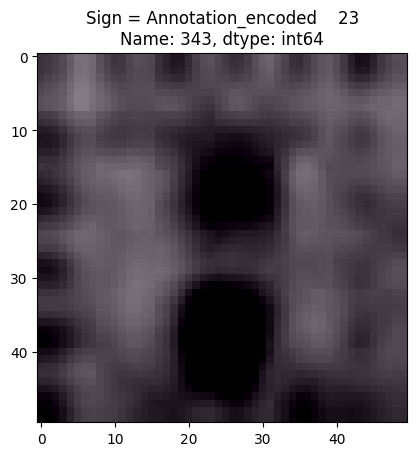

In [ ]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0,X_train_images.shape[0])
img = X_train_images[idx]
plt.figure()
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Sign = {}'.format(Y_train.iloc[idx]))
plt.show()

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPool2D
# from keras.layers import Input
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras 
# model = Sequential()
# model.add(Input(shape=(50,50,1)))
# model.add(Conv2D(32,(3,3),padding='valid',activation='relu',name='Conv2D1',input_shape=(50,50,1)))
# model.add(MaxPool2D(pool_size=(2,2),name='MaxPool2D1'))
# model.add(Conv2D(64,(3,3),padding='valid',activation='relu',name='Conv2D2'))
# model.add(MaxPool2D(pool_size=(2,2),name='MaxPool2D2'))
# model.add(Conv2D(128,(3,3),padding='valid',activation='relu',name='Conv2D3'))
# model.add(MaxPool2D(pool_size=(2,2),name='MaxPool2D3'))
# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='linear'))

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.models import Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load pre-trained ResNet50V2 model
resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(50,50,3))

# Freeze all layers in the base model
for layer in resnet.layers:
    layer.trainable = False

# Add custom output layers on top of the base model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

# Create a new model with the custom output layers
model = Model(inputs=resnet.input, outputs=predictions)

# Compile the model
# model.compile(optimizer='adam', loss='mse')


94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 27, 27, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
history=model.fit(X_train_images,Y_train,epochs=10,batch_size=32,verbose=1,validation_data=(X_val_images,Y_val))

Epoch 1/10
158/158 [==============================] - 86s 523ms/step - loss: 59.2083 - accuracy: 0.0056 - val_loss: 57.6439 - val_accuracy: 0.0072
Epoch 2/10
158/158 [==============================] - 83s 529ms/step - loss: 45.9670 - accuracy: 0.0058 - val_loss: 53.3382 - val_accuracy: 0.0064
Epoch 3/10
158/158 [==============================] - 81s 511ms/step - loss: 38.7761 - accuracy: 0.0088 - val_loss: 52.9375 - val_accuracy: 0.0080
Epoch 4/10
158/158 [==============================] - 79s 503ms/step - loss: 33.2735 - accuracy: 0.0086 - val_loss: 49.1806 - val_accuracy: 0.0072
Epoch 5/10
158/158 [==============================] - 73s 463ms/step - loss: 28.0355 - accuracy: 0.0105 - val_loss: 49.4052 - val_accuracy: 0.0088
Epoch 6/10
158/158 [==============================] - 79s 504ms/step - loss: 23.8703 - accuracy: 0.0103 - val_loss: 46.8539 - val_accuracy: 0.0088
Epoch 7/10
158/158 [==============================] - 79s 504ms/step - loss: 20.2508 - accuracy: 0.0127 - val_loss: 46

In [ ]:
test_loss, test_acc = model.evaluate(X_test_images, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 20s 391ms/step - loss: 43.1431 - accuracy: 0.0108
Test loss: 43.143062591552734
Test accuracy: 0.01082113292068243


In [ ]:
import cv2
import numpy as np

# Load the image you want to predict
img = cv2.imread('/content/cropped_images/cropped_1022.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50,50)) # Resize the image to 50x50 pixels
img = img_to_array(img)  # convert to numpy array
img = np.expand_dims(img, axis=0) # Add an extra dimension for the batch size
img = preprocess_input(img) # Add an extra dimension for the batch size
print(img.shape)
# Make the prediction
prediction_score = model.predict(img)
print(prediction_score)
out_signal=class_names[int(prediction_score)]
print(out_signal)

(1, 50, 50, 3)
1/1 [==============================] - 0s 65ms/step
[[18.941843]]
rampSpeedAdvisoryUrdbl


In [ ]:
import h5py

In [ ]:
model.save("model_prediction_images.h5")

In [ ]:
# import cv2
# import numpy as np

# # Load the YOLOv3 model
# net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# # Define the classes
# classes = ['person', 'car', 'truck', 'bus', 'traffic light', 'stop sign', 'parking meter']

# # Load the image
# img = cv2.imread('/content/aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/keepRight_1330547092.avi_image12.png')

# # Get the image dimensions
# height, width, channels = img.shape

# # Create a blob from the image
# blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), swapRB=True, crop=False)

# # Set the input to the YOLOv3 model
# net.setInput(blob)

# # Get the output layer names
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# # Run inference on the model
# outs = net.forward(output_layers)

# # Loop over the detected objects
# for out in outs:
#     for detection in out:
#         # Get the class index and confidence score
#         scores = detection[5:]
#         class_index = np.argmax(scores)
#         confidence = scores[class_index]

#         # If the confidence score is high enough, print the class name
#         if confidence > 0.5:
#             class_name = classes[class_index]
#             print(class_name)


error: ignored